# Hackathon
##### June 17, 2023 - 4:00pm until 4:02am

On June 17 four girls of the ORCSGirls Academy met at 4pm in Gather Town to embark on a journey into numbers and strange math things. Twelve hours later they emerged victoreously having conquered plotting, the logistics map, complex numbers and the Mandelbrot set.

In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import YouTubeVideo

%matplotlib widget

### Simple plotting

First we look at `matplotlib` and how to graph data. In this notebook we use tell matplotlib to create a widget (see line `%matplotlib widget` above) for the plot which allows us to update and zoom into plots. Note this might not work on Colaboratory - here you can use `%matplotlib inline` for non interactive plots.

While in other notebooks we have used `plt.plot()` to plot inline, this would add the data to the last widget. To create a new plot, we need to make a new figure as shown below. 

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot([3,2,1.5,2.2,3.21,-2])

One of the fun things we can do is to add more interactivity to the plot, e.g. using sliders for the slope and imtercept in an equation $y=mx+b$ for a line. See below.

In [ ]:
def line(m,b):
    xvals=[]                        # Empty list for x values
    yvals=[]                        # Empty list for y values
    for x in np.arange(-4,4,0.05):  # Loop from -4 to 4 in steps of 0.05
        xvals.append(x)             # Add x vlaue to the list
        yvals.append(m*x+b)         # Calculate y and add to the list
    return xvals, yvals             # return both lists

Now we use that function to calcualrte the points and call it everytime the slider is moved. Note that `def update` needs to follow `@widgets.interact` directly. This is the routine called everytime a slider is moved.

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
plt.xlabel('x')
plt.ylabel('y')

@widgets.interact(m=(-5,5,0.1), b=(-5,5,0.1))  # defining the slides, names and ranges
def update(m=1,b=0):
    [l.remove() for l in ax.lines]             # Removing lines from previos plot
    x, y = line(m,b)                           # Calculating the values
    ax.plot(x,y, color='blue')                 # Plotting

# Now the fun - the Logistic Map

Before we start coding this ourselves, here is a video that gives a good introduction on the equation and the many ways we encouter this.

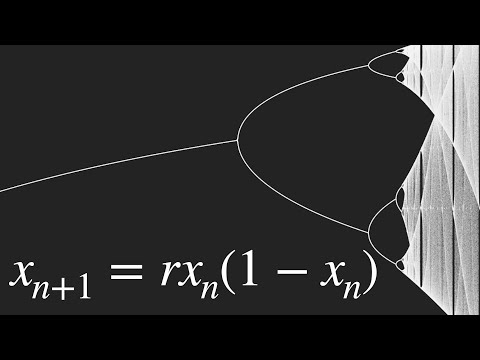

In [3]:
YouTubeVideo("ovJcsL7vyrk", width=600)

#### Here is the equation: $x_{n+1} = r x_{n}(1 - x_{n})$

Following the notation in the norebook, $r$ is the growth rate and $x$ is population. This is not the actual number, but the fraction of the maximum possible population, so it ranges from 0 to 1.

#### Step 1: Visualize the function

Let's define a function `growth` and plot how the population next year depends on the population this year;

In [5]:
def growth(x,r):
    return r*x*(1-x)

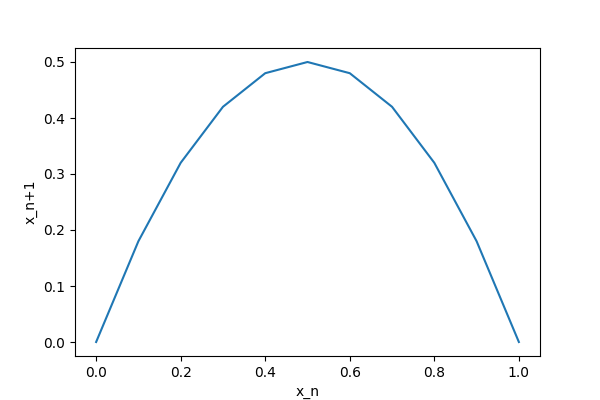

In [8]:
r = 2.0   # Growth rate of 2
x = 0.4   # Initial population 40% (or 0.4) of the possible maximum

xpts = np.arange(0.0,1.1,0.1)           # Values for x from 0 to 1 (note the 1.1)
ypts = [growth(x,r) for x in xpts]      # One line loop to calculate all the y's

fig, ax = plt.subplots(figsize=(6,4))   # Making the new plot
plt.xlabel('x_n')
plt.ylabel('x_n+1')

ax.plot(xpts,ypts)

Woohoo, just like in the video. He have a 'single hump function' with a negative feedback, meaning when the population gets too big the dowturn of the parabula will reduce the population as you can see on the graph.

#### Step 2: Behaviour as time goes on

We are most interested in the long term behaviour of the function as we repeatley call it. In other words what happens to the population after a long time. In the function below we calculate the value of $x_{n} = r x_{n-1}(1 - x_{n-1})$ for all $n$. Note that we have rewritten this so the value we calculate os $n$ and it depends on the earlier value $n-1$ which is how we implement it by using the list element `[-1]`.

In [10]:
def growthtime(x0,r,nmax):
    vals=[x0]                                  # First element is the initial pop.
    for i in range(nmax-1):                    # Loop to the maximum number nmax we want.
                                               #   the -1 is because we already added x0
        vals.append(r*vals[-1]*(1-vals[-1]))   # Append the calculated vale
    return vals                                # Return all values

interactive(children=(FloatSlider(value=0.4, description='x0', max=0.9, min=0.1), FloatSlider(value=1.2, descr…

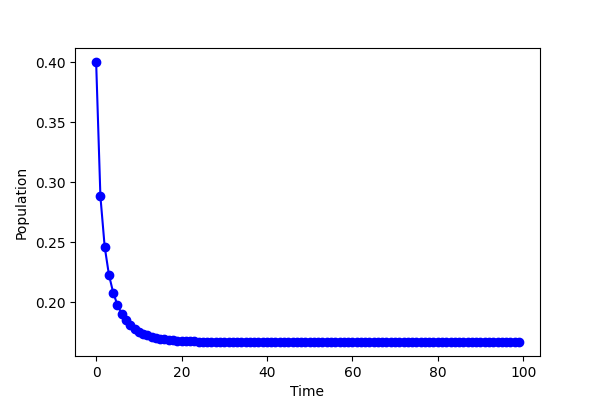

In [12]:
fig, ax = plt.subplots(figsize=(6,4))
plt.xlabel('Time')
plt.ylabel('Population')

@widgets.interact(x0=(0.1,0.9,0.1),r=(0.5,4.0,0.01))
def update(x0=0.4, r=1.2):
    [l.remove() for l in ax.lines]
    ax.plot(growthtime(x0,r,100), color="blue", marker='o')    # Adding some markers

Explore how the function depends on `x0` and `r`. Anything spooky 😨

#### Step 3: Exploring as function of growth rate $r$

You might have seen strange behaviour for certain values of $r$, so next we explore the resulting populations after some time. Because there are multiple values the function oscillates around, we simply loop ofer $r$ and then plot the last `nplot` points ion a scatter plot.

In [13]:
x0 = 0.4         # Starting population
nmax  = 300      # Maximum value of n for calculate
nplot = 150      # First point to plot, so we plot nplot:nmax

rvals=[]         # List for values of r
lvals=[]         # List for resulting values of x (there will be nmax values for each r)

for r in np.arange(0.9,4.0,0.001):              # Loop over r - note the fine grid
    lvals.append(growthtime(x0,r,nmax)[nplot:]) # Getting list of x starting at nplot 
    rvals.append([r]*(nmax-nplot))              # We need the same number of r's so
                                                # lists are the same length
    
# Now we need to turn the list of lists into one contineous list for plotting
lvals = np.array(lvals).ravel()
rvals = np.array(rvals).ravel()

All that is left is to plot. Adjust marker size and color below. Also explore changing nmax, nplot and the step size in r. Enjoy.

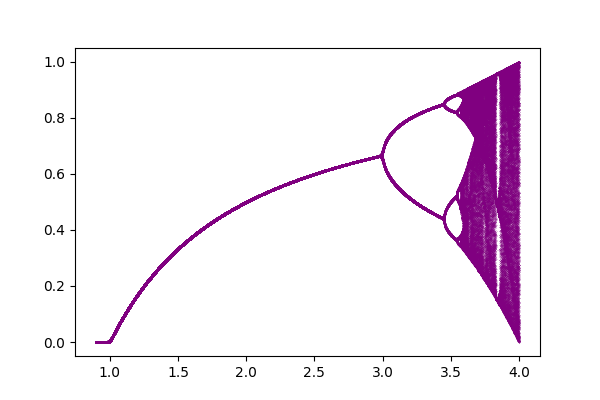

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
plt.scatter(rvals,lvals,s=0.02,color='purple')

# Mandelbrot Set

Here is part two. The equation to generate the well known Mandelbrot set is simply $z_{n+1}=z_{n}^2 + c$ where $c$ is a complex number. Complex numbers have a real and imaginary part and can be visualised in 2D - think of the real and imaginary parts as x and y. These numbers solve the issue with square roots of negative numbers by defining $i=sqrt(-1)$ and a complex number is simply $a+ib$. Here $a$ is the real part and $b$ the imaginary one. 

In Python we can create complex numbers with `c = complex(a,b)`.

#### Understanding the equation

Here is the equation again: $z_{n+1}=z_{n}^2 + c$. To see of a point $c$ in the colplex plain belongs to the Mandelbrot set, we iterate over the equation - measning we start with z=0 and plug it in to calculate the next z. Then we plug that one in to calculate the next and so on. If z stays a finite number even after infinite iterations, that point c we used is part of the set, otherwise it is not.

#### Creating a grey scale version

Let's define a function `mandelbrot`. We pass c to it and then keep evaluating the equation as long as the value of z stays below 2 (we picked that somewhat randomly) AND the number of iterations is still below the maximum.

So if the returned number of iterations is nmax, we know the value did not exceed 2, so the point c is part of the set. If n is less that nmax, the loop ended because the value was exceeding 2, so the point c is NOT part of the Mandelbrot set.

In [17]:
nmax = 100

def mandelbrot(c):
    z=0
    n=0
    while abs(z)<= 2 and n < nmax:
        z = z*z + c
        n = n + 1
        
    return n

Now to make the beautiful images, we need to loop over x,y pixels of an image, convert the x,y to the values of the complex c and call the mandelbrot function. We then use the returned number of iterations n to set the color of the pixel.

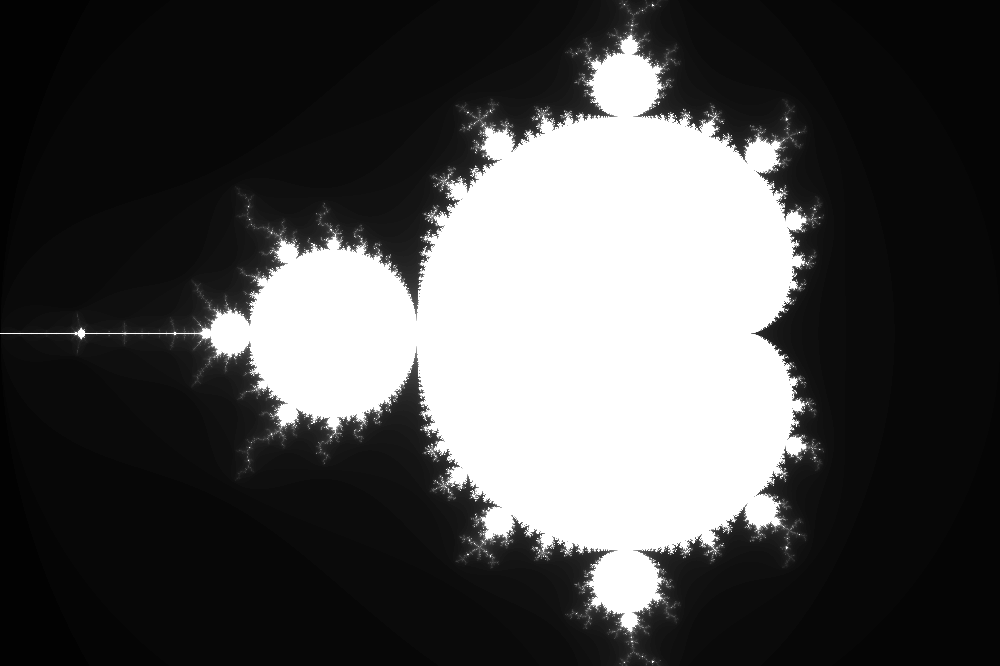

In [22]:
# Desired image size 
width = 1000
height = 666

# The range in the complex plane to map onto the image
re_start = -2
re_end = 1
im_start = -1
im_end = 1

# Creating an empty image
im = Image.new('RGB', (width, height), (0,0,0))
draw = ImageDraw.Draw(im)

# Loop over all pixels
for x in range(width):
    for y in range(height):
        c = complex(re_start + (x / width) * (re_end - re_start),   # Convert x,y to c
                    im_start + (y / height) * (im_end - im_start))
        n = mandelbrot(c)
        color = int(n / nmax * 255)              # scaling the n to the range 0 to 255
        draw.point([x,y],(color,color,color))    # Using the value for r,g,b for greyscale

im   # show the image

#### Using colors

Above we used the value n to create a grey scale images using the color (n,n,n). It would be easy to make it other colors e.g. red by using (n,0,0) in the `draw.Point` command. To have colors changing as function of n, we can desacribe the colors as hue, saturation and value (color wheel) and use n to select the hue. Additionally we need to set the brightness to 0 is the point is part of the Mandelbrot set, so it is black. The code is very similar to before, just the assignment of color is different.

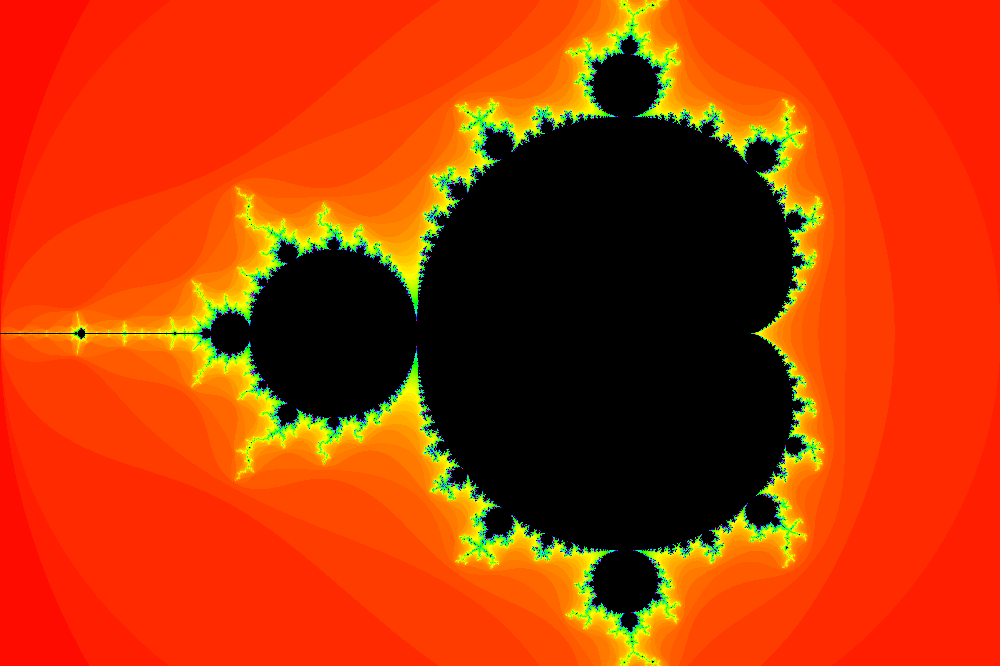

In [25]:
# Desired image size 
width = 1000
height = 666

# The range in the complex plane to map onto the image
re_start = -2
re_end = 1
im_start = -1
im_end = 1

# Creating an empty image
im = Image.new('HSV', (width, height), (0,0,0))
draw = ImageDraw.Draw(im)

for x in range(width):
    for y in range(height):
        c = complex(re_start + (x / width) * (re_end - re_start),
                    im_start + (y / height) * (im_end - im_start))
        n = mandelbrot(c)
        hue = int(n / nmax * 255)
        value = 255 if n < nmax else 0    # Here we make the point of the set black
        saturation = 255
        draw.point([x,y],(hue,saturation,value))

im=im.convert('RGB')   # We need to convert to RGB, so we can display it in the notebook
im

Time to save the image :)

In [24]:
im.save('Beauty.png')